In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

accelerator = "GPU T4"

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

from sklearn.model_selection import train_test_split

from pathlib import Path
import os, sys

import pydicom
import random
import json


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/vindr-mammo-dataset/finding_annotations.csv
/kaggle/input/vindr-mammo-dataset/breast-level_annotations.csv
/kaggle/input/vindr-mammo-dataset/metadata.csv
/kaggle/input/vindr-mammo-dataset/Processed_Images/c3a4083c5d1cbae24bf78b95465c89b1/a85636bc3e9a44de2cfe0341fa2b2421.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/c3a4083c5d1cbae24bf78b95465c89b1/39e183171ffaf61b0d40bb198f013a7c.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/c3a4083c5d1cbae24bf78b95465c89b1/ef1c9c8dd072e1c43a7172dfddd7660e.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/c3a4083c5d1cbae24bf78b95465c89b1/0207463fd1940306b1fdb35605c04ef8.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/fd8338217d77f6b2f373272d4bb10608/748d7d7d6f67d8b6951d0eedafe232e6.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/fd8338217d77f6b2f373272d4bb10608/99bd5d6ca477c2ade77d1d4195d7e6a8.png
/kaggle/input/vindr-mammo-dataset/Processed_Images/fd8338217d77f6b2f373272d4bb10608/eb781448bbc3a6a04080aa

In [2]:
df = pd.read_csv('/kaggle/input/vindr-mammo-dataset/finding_annotations.csv')

In [3]:
#comptar els nulls de cada variable
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/len(df))*100})
missing_data

,total_missing,perc_missing
study_id,0,0.000000
series_id,0,0.000000
image_id,0,0.000000
laterality,0,0.000000
view_position,0,0.000000
height,0,0.000000
width,0,0.000000
breast_birads,0,0.000000
breast_density,0,0.000000
finding_categories,0,0.000000


In [4]:
df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20481,f2093a752e6b44df5990f5fd38c99dd2,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,R,CC,2812,2012,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20482,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,R,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20483,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,L,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20484,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,R,MLO,3580,2686,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


# **PRE-PROCESSING**

**PASSSAR TOTES LES VARIABLES A NUMÈRIQUES**

In [5]:
tipus_birads = df['breast_birads'].unique()
print(f'Tipus birads: {tipus_birads}')

tipus_densitat = df['breast_density'].unique()
print(f'Tipus birads: {tipus_densitat}')

tipus_finding = df['finding_categories'].unique()
print(f'Tipus finding categories: {tipus_finding}')

tipus_finding_birads = df['finding_birads'].unique()
print(f'Tipus finding birads: {tipus_finding_birads}')

Tipus birads: ['BI-RADS 4' 'BI-RADS 3' 'BI-RADS 5' 'BI-RADS 2' 'BI-RADS 1']
Tipus birads: ['DENSITY C' 'DENSITY D' 'DENSITY A' 'DENSITY B']
Tipus finding categories: ["['Mass']" "['Global Asymmetry']" "['Architectural Distortion']"
 "['Nipple Retraction', 'Mass']"
 "['Suspicious Calcification', 'Focal Asymmetry']" "['Focal Asymmetry']"
 "['Asymmetry']" "['Suspicious Calcification']"
 "['Suspicious Calcification', 'Architectural Distortion']"
 "['Suspicious Calcification', 'Mass']" "['Skin Thickening']"
 "['Suspicious Lymph Node']" "['Nipple Retraction', 'Asymmetry']"
 "['Skin Thickening', 'Mass']" "['Asymmetry', 'Mass']"
 "['Architectural Distortion', 'Asymmetry']"
 "['Suspicious Calcification', 'Asymmetry']" "['Nipple Retraction']"
 "['Suspicious Calcification', 'Nipple Retraction', 'Mass']"
 "['Skin Retraction', 'Nipple Retraction', 'Mass']"
 "['Focal Asymmetry', 'Mass']"
 "['Nipple Retraction', 'Skin Thickening', 'Mass']" "['Skin Retraction']"
 "['Suspicious Calcification', 'Archite

In [6]:
#passem totes les categòriques a numèriques
#lateralitat = {'L':1, 'R': 0}
#df['laterality'] = df['laterality'].map(lateralitat)

#vista = {'MLO':1, 'CC': 0}
#df['view_position'] = df['view_position'].map(vista)

#birads = {'BI-RADS 1': 1, 'BI-RADS 2': 2, 'BI-RADS 3': 3, 'BI-RADS 4': 4,'BI-RADS 5': 5}
#df['breast_birads'] = df['breast_birads'].map(birads)

#densitat = {'DENSITY A': 1, 'DENSITY B': 2, 'DENSITY C': 3, 'DENSITY D': 4}
#df['breast_density'] = df['breast_density'].map(densitat)

#finding = {'DENSITY A': 1, 'DENSITY B': 2, 'DENSITY C': 3, 'DENSITY D': 4}
#df['finding_categories'] = df['finding_categories'].map(finding)

#finding_birads = {'BI-RADS 3': 3, 'BI-RADS 4': 4,'BI-RADS 5': 5}
#df['finding_birads'] = df['finding_birads'].map(finding_birads)
#df

#eliminem la columna split perquè ja no la necessitem
#train = train.drop(['split'], axis = 1)
#train

# **GENEREM EL NOU CSV**

In [7]:
from fastai.vision.all import *
import pandas as pd
import shutil

csv_path = "/kaggle/input/vindr-mammo-dataset/finding_annotations.csv"
processed_images_path = "/kaggle/input/vindr-mammo-dataset/Processed_Images"
output_csv_path = "/kaggle/working/arxiu_actualitzat.csv"
df = pd.read_csv(csv_path)


# Llista per guardar les rutes de les imatges trobades a les carpetes i al csv
found_image_paths = []

# Iterar a les carpetes de study_id
for study_folder in os.listdir(processed_images_path):
    study_path = os.path.join(processed_images_path, study_folder)

    if os.path.isdir(study_path):
        # Iterar sobre les imatges (image_id) dins de cada carpeta de study_id
        for image_file in os.listdir(study_path):
            if image_file.endswith('.png'):
                image_id = os.path.splitext(image_file)[0]

                # Comprovar si image_id está en el CSV
                if image_id in df['image_id'].values:
                    found_image_paths.append(os.path.join(study_path, f"{image_id}.png"))

# Crear un DataFrame amb les rutes de les imatges úniques trobades
unique_image_paths = list(set(found_image_paths))
new_df = df[df['image_id'].isin([os.path.splitext(os.path.basename(path))[0] for path in unique_image_paths])]

# Comptar les imatges no trobades a les carpetes 
unfound_images_count = len(df) - len(new_df)

# Comptar les imatges duplicades al tenir més d'una lesió  
imatges_repetides = new_df[new_df.duplicated(['image_id'])]
print(f"Número d'imatges repetides: {len(imatges_repetides)}")

# Eliminar imatges duplicades del DataFrame
new_df = new_df.drop_duplicates(subset='image_id', keep='first')

print(f"Número d'imatges no trobades a les carpetes: {unfound_images_count}")

# Guardar-ho tot en el nou csv (arxiu_actualitzat) en el path d'output
new_df.to_csv(output_csv_path, index=False)

print(f"Nou CSV amb imatges trobades a les carpetes creat a: {output_csv_path}")

Número d'imatges repetides: 486
Número d'imatges no trobades a les carpetes: 0
Nou CSV amb imatges trobades a les carpetes creat a: /kaggle/working/arxiu_actualitzat.csv


In [8]:
new_df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20481,f2093a752e6b44df5990f5fd38c99dd2,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,R,CC,2812,2012,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20482,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,R,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20483,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,L,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20484,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,R,MLO,3580,2686,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


In [9]:
# Comprovo que dins un mateix estudi totes les imatges siguin train o totes test, que no estiguin contaminades
for study_id in df['study_id'].unique():
    # Obté la divisió per aquest estudi
    split_value = df.loc[df['study_id'] == study_id, 'split'].iloc[0]

    # Obté les imatges per aquest estudi
    images = df[df['study_id'] == study_id]

    # Comprova si totes les imatges tenen la mateixa divisió que l'estudi
    for index, row in images.iterrows():
        image_id = row['image_id']
        image_split = row['split']

        if image_split != split_value:
            print(f"Estudi {study_id}: La imatge {image_id} té una divisió diferent ({image_split}) que l'estudi ({split_value})")

print("Comprovació acabada. Cap error detectat.")

Comprovació acabada. Cap error detectat.


# **TRAIN/TEST**

**COMPTEM QUANTS TRAIN/TEST TENIM A SPLIT**

In [10]:
tipus_split = new_df['split'].unique()

# mostra quins tipus d'split tenim (train/test)
print(f'Tipus split: {tipus_split}')

# compte quants en tenim de cada tipus
quants_split = new_df['split'].value_counts()
print(f'Quantitat: \n{quants_split}')

# PRIMER POSEM A LA CARPETA TRAIN ELS VALORS TRAINING
# valor0 és training
valor0 = tipus_split[0]
print(f'Tipus: {valor0}')

# comparem el valor0 (training) amb tota la taula per dividir-la
train_images =new_df[new_df['split'] == valor0]

# comptem quants training tenim
quantitat = train_images['split'].value_counts()
print(f'Quantes imatges de {valor0} tenim: {len(quantitat)}')

# sho guarda com a output: train.csv
train_images.to_csv('/kaggle/working/train.csv', index=False)

# guarda aquí les imatges de test 
test_images = new_df[new_df['split'] != valor0]
print(f'Nombre imatges test: {len(test_images)}')
# guarda test com a csv 
test_images.to_csv('/kaggle/working/test.csv', index=False)

Tipus split: ['training' 'test']
Quantitat: 
split
training    16000
test         4000
Name: count, dtype: int64
Tipus: training
Quantes imatges de training tenim: 1
Nombre imatges test: 4000


In [11]:
train = pd.read_csv('/kaggle/working/train.csv')
train

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,f2093a752e6b44df5990f5fd38c99dd2,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,R,CC,2812,2012,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
15996,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,R,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
15997,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,L,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
15998,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,R,MLO,3580,2686,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


In [12]:
test = pd.read_csv('/kaggle/working/test.csv')
test

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,2f944efb1cb9579442df2d7fe6a579b7,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2171.810059,439.584991,2403.370117,test
1,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,7385e8cf7b29764525c81de4aa1aebe4,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2045.170044,417.876007,2265.879883,test
2,917a4de3b1f921f1c9fa98b7a61d749d,22bada39b619f79a660b3a06eb6ff5a9,4dd8faf113a9421e03a6e2bcd4238da2,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,153.445999,1873.619995,449.356995,2225.020020,test
3,917a4de3b1f921f1c9fa98b7a61d749d,22bada39b619f79a660b3a06eb6ff5a9,19056b152c5d2ed98f66de006fa45a6c,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,141.677002,1369.229980,432.544006,1619.739990,test
4,31fa226bc9f87e0a2cb2de6dddbc2270,98ca3b2d3a802a417d2942bc5f0fc036,625aa350502a7038cfe5f9ca5f1a65f4,L,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,192.143005,1897.510010,373.973999,1993.380005,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5e9175554fa9d6b9fb424d7065be4f20,a07d1cc99c7611c815ea99acb324f3b6,4adfc32f03228403f518f24e9b9313cf,R,MLO,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,test
3996,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,4835a79d7e25eebd20104e7147cbcfb4,L,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,test
3997,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,ebb437593a3fc80277296638f0607f5b,L,MLO,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,test
3998,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,9188a01b6b648cee39fb70702a860141,R,CC,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,test


# **CLASSIFICACIÓ**

**GRÀFICS I EVALUACIÓ MODEL**

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, recall_score, auc
import numpy as np

def evaluacio_model_binari(model, dataloaders, classes):
    
    # Obtener las predicciones y etiquetas reales del conjunto de prueba
    preds, targets = model.get_preds(ds_idx=1)
    
    # Imprimir un informe de clasificación que incluye más métricas
    print('Classification Report:')
    print(classification_report(targets, preds.argmax(dim=1), target_names=dataloaders.vocab))
    
    # Convertir las etiquetas a formato binario
    #y_true_bin = label_binarize(targets, classes=list(range(len(dataloaders.vocab))))
    
    # Calcular la curva ROC y AUC para todas las clases
    fpr, tpr, thresholds = roc_curve(targets, preds[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Dibujar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Corba ROC per classe')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calcular i mostrar la matriu de confusió
    predicted_classes = preds.argmax(dim=1)
    cm = confusion_matrix(targets, predicted_classes)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dls.vocab, yticklabels=dls.vocab)
    plt.xlabel('Prediccions')
    plt.ylabel('Etiquetes Verdaderes')
    plt.title('Confusion Matrix')
    plt.show()

    # Calcular altres mètriques
    print('\nAltres mètriques:')
    print(f'False Positive Rate: {cm[0, 1] / cm[0, :].sum():.4f}')
    print(f'False Negative Rate: {cm[1, 0] / cm[1, :].sum():.4f}')
    print(f'Sensitivity: {recall_score(targets, predicted_classes, average="weighted"):.4f}')
    print(f'Specificity: {cm[0, 0] / cm[0, :].sum():.4f}')

In [14]:
# MÚLTIPLES CLASSES

from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, recall_score, auc

def evaluacio_multiples_classes(model, dataloader, classes):

    # Obtenir las prediccions i etiquetes reals del conjunt de prova
    preds, targets = learn.get_preds(ds_idx=1)

    # Imprimir un informe de clasificació que inclouen més mètriques
    print('Classification Report:')
    print(classification_report(targets, preds.argmax(dim=1), target_names=dls.vocab))

    # Convertir les etiquetes a format binari
    y_true_bin = label_binarize(targets, classes=list(range(len(dls.vocab))))

    # Inicialitzar llistes per guardar taxes de falsos positius i verdaders positius 
    all_fpr = []
    all_tpr = []

    # Calcular la corba ROC de cada classe
    for i in range(len(dls.vocab)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], preds[:, i])
        all_fpr.append(fpr)
        all_tpr.append(tpr)

    # Calcular l'àrea sota la corba (AUC) de cada classe
    roc_aucs = [auc(fpr, tpr) for fpr, tpr in zip(all_fpr, all_tpr)]

    # Dibuixar la corba ROC para cada classe
    plt.figure(figsize=(8, 8))
    for i, class_name in enumerate(dls.vocab):
        plt.plot(all_fpr[i], all_tpr[i], label=f'AUC ({class_name}) = {roc_aucs[i]:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Corba ROC per classe')
    plt.legend(loc='lower right')
    plt.show()

    # Calcular i mostrar la matriu de confusió
    predicted_classes = preds.argmax(dim=1)
    cm = confusion_matrix(targets, predicted_classes)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dls.vocab, yticklabels=dls.vocab)
    plt.xlabel('Prediccions')
    plt.ylabel('Etiquetes Verdaderes')
    plt.title('Confusion Matrix')
    plt.show()

    # Calcular altres mètriques
    print('\nAltres mètriques:')
    print(f'False Positive Rate: {cm[0, 1] / cm[0, :].sum():.4f}')
    print(f'False Negative Rate: {cm[1, 0] / cm[1, :].sum():.4f}')
    print(f'Sensitivity: {recall_score(targets, predicted_classes, average="weighted"):.4f}')
    print(f'Specificity: {cm[0, 0] / cm[0, :].sum():.4f}')

# **PER VIEW_POSITION**

In [15]:
# Miro quantes tinc de cada categoria (CC o MLO)
path_arxiu = '/kaggle/working/train.csv'

df = pd.read_csv(path_arxiu)
nom_columna = "view_position"
quantitat = df[nom_columna].value_counts()

print(f"Quantitat de la columna '{nom_columna}':\n{quantitat}")

Quantitat de la columna 'view_position':
view_position
CC     8001
MLO    7999
Name: count, dtype: int64


In [16]:
from fastai.data.all import *
from fastai.vision.all import *

# Directori on hi ha les imatges
path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')

# Transformacions
tfms = [*aug_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), Normalize.from_stats(*imagenet_stats)]

# Crear bloc de dades
# Variable x són les imatges i variable y la etiqueta per classificar el model
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
    get_y = lambda row: row["view_position"],
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=tfms
)

# Comprovar si fem servir la GPU 
print(torch.cuda.is_available())

# Crear dataloaders
dls = data.dataloaders(train, bs=64).cuda()

# Imprimir les etiquetes
print("Etiquetes:", dls.vocab)
print("Nom de les classes:", dls.vocab.o2i)

# Crear el model de classificació
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)

# Entrenar el model
learn.fine_tune(epochs=3, base_lr=1e-2, freeze_epochs=1)

# Evaluar en el conjunt de prova (test)
t = pd.read_csv('/kaggle/working/test.csv')
test_dls = data.dataloaders(t, bs=32).cuda()
test_acc = learn.validate(dl=test_dls[0])[1]
print(f"Accuracy en el conjunt de prova: {test_acc}")

True
Etiquetes: ['CC', 'MLO']
Nom de les classes: {'CC': 0, 'MLO': 1}


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 239MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.151760,0.191507,0.945000,04:44


epoch,train_loss,valid_loss,accuracy,time
0,0.055941,0.034911,0.987500,04:11
1,0.038146,0.116749,0.956250,04:11
2,0.012827,0.025955,0.990937,04:09


Accuracy en el conjunt de prova: 0.9981250166893005


Classification Report:
              precision    recall  f1-score   support

          CC       0.98      1.00      0.99      1547
         MLO       1.00      0.98      0.99      1653

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200



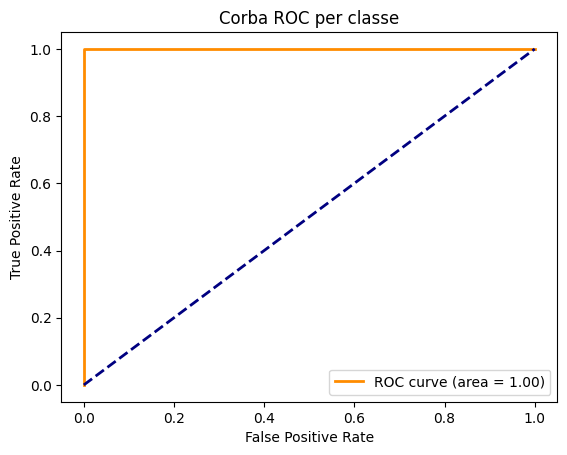

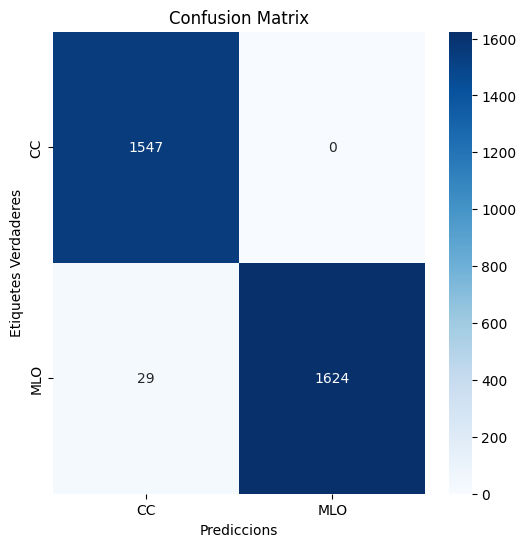


Altres mètriques:
False Positive Rate: 0.0000
False Negative Rate: 0.0175
Sensitivity: 0.9909
Specificity: 1.0000


In [17]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

# **PER LATERALITY**

In [18]:
# Miro quantes tinc de cada categoria (R o L)
path_arxiu = '/kaggle/working/train.csv'

df = pd.read_csv(path_arxiu)
nom_columna = "laterality"
quantitat = df[nom_columna].value_counts()

print(f"Quantitat de la columna '{nom_columna}':\n{quantitat}")

Quantitat de la columna 'laterality':
laterality
R    8000
L    8000
Name: count, dtype: int64


In [19]:
from fastai.data.all import *
from fastai.vision.all import *

# Directori on hi ha les imatges
path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')

# Transformacions
tfms = [*aug_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2, do_flip = False, flip_vert = False), Normalize.from_stats(*imagenet_stats)]
# do_flip i flip_vert
# Crear bloc de dades
# Variable x són les imatges i variable y la etiqueta per classificar el model
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
    get_y = lambda row: row["laterality"],
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=tfms
)

# Comprovar si fem servir la GPU 
print(torch.cuda.is_available())

# Crear dataloaders
dls = data.dataloaders(train, bs=64).cuda()

# Imprimir les etiquetes
print("Etiquetes:", dls.vocab)
print("Nom de les classes:", dls.vocab.o2i)

# Crear el model de classificació
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)

# Entrenar el model
learn.fine_tune(epochs=3, base_lr=1e-2, freeze_epochs=1)

# Evaluar en el conjunt test
t = pd.read_csv('/kaggle/working/test.csv')
test_dls = data.dataloaders(t, bs=32).cuda()
test_acc = learn.validate(dl=test_dls[0])[1]
print(f"Accuracy en el conjunt de prova: {test_acc}")

True
Etiquetes: ['L', 'R']
Nom de les classes: {'L': 0, 'R': 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.015927,0.010293,0.997187,04:04


epoch,train_loss,valid_loss,accuracy,time
0,0.014488,0.007338,0.999375,04:07
1,0.004054,0.007047,0.999375,04:11
2,0.001186,0.001666,0.999375,04:11


Accuracy en el conjunt de prova: 1.0


Classification Report:
              precision    recall  f1-score   support

           L       1.00      1.00      1.00      1584
           R       1.00      1.00      1.00      1616

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



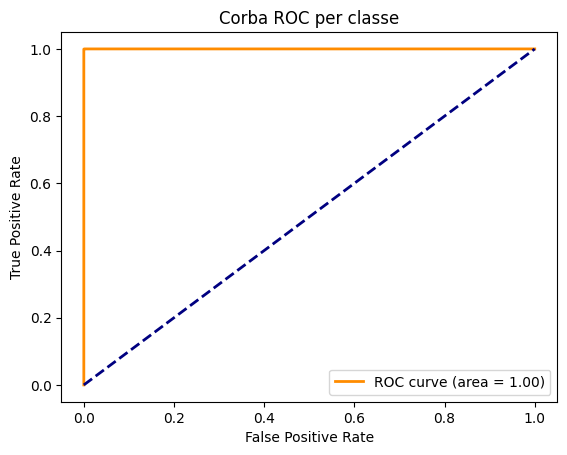

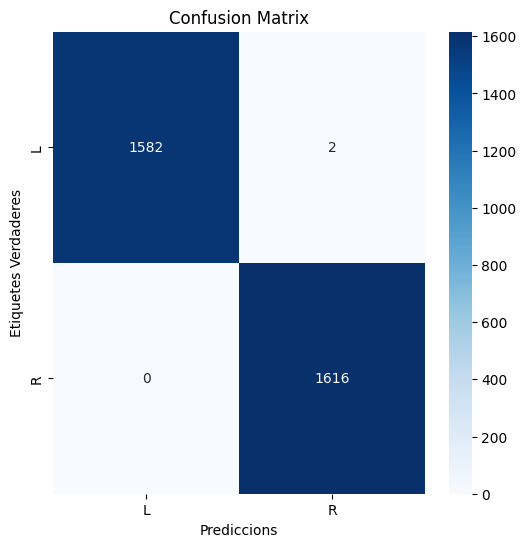


Altres mètriques:
False Positive Rate: 0.0013
False Negative Rate: 0.0000
Sensitivity: 0.9994
Specificity: 0.9987


In [20]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

# **PER DENSITAT**

# **4 CLASSES**

In [21]:
# miro quantes tinc de cada categoria (A, B, C, D)
path_train = '/kaggle/working/train.csv'
path_test = '/kaggle/working/test.csv'
tr = pd.read_csv(path_train)
tt = pd.read_csv(path_test)
nom_columna = "breast_density"
quantitat_train = tr[nom_columna].value_counts()
quantitat_test = tt[nom_columna].value_counts()

print(f"Quantitat conjunt train:\n{quantitat_train}")
print(f"Quantitat conjunt test:\n{quantitat_test}")

Quantitat conjunt train:
breast_density
DENSITY C    12232
DENSITY D     2160
DENSITY B     1528
DENSITY A       80
Name: count, dtype: int64
Quantitat conjunt test:
breast_density
DENSITY C    3060
DENSITY D     540
DENSITY B     380
DENSITY A      20
Name: count, dtype: int64


In [22]:
from fastai.vision.all import *

def densitat_quatre_classes(path, train, test, arch=resnet34, bs=64, epochs=5, base_lr=1e-3, freeze_epochs=2):
    
    path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')

    # Transformacions
    tfms = [*aug_transforms(max_zoom=1, max_warp=0.1, max_rotate=0.1, max_lighting=0.2), Normalize.from_stats(*imagenet_stats)]

    # Crear bloc de dades per breast_density
    data = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_x=lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
        get_y=lambda row: row["breast_density"],
        splitter=RandomSplitter(valid_pct=0.2),
        item_tfms=RandomResizedCrop(224, min_scale=0.5),
        batch_tfms=tfms
    )

    # Crear dataloaders
    dls = data.dataloaders(train, bs=bs).cuda()

    # Imprimir les etiquetes
    print("Etiquetes:", dls.vocab)
    print("Nom de les classes:", dls.vocab.o2i)

    # Crear el model de clasificació per breast_density
    learn = vision_learner(dls, arch, metrics=accuracy, pretrained=True)

    # Entrenar el model
    learn.fine_tune(epochs=epochs, base_lr=base_lr, freeze_epochs=freeze_epochs)

    # Evaluar en el conjunt de prova
    t = pd.read_csv('/kaggle/working/test.csv')
    test_dls = data.dataloaders(t, bs=32).cuda()
    test_acc = learn.validate(dl=test_dls[0])[1]
    print(f"Accuracy en el conjunt de prova: {test_acc}")
    
    return learn, test_dls

**SPLIT ORIGINAL**

In [23]:
# Creo dataloaders i entreno model per train i test
learn, dls = densitat_quatre_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train, test)

Etiquetes: ['DENSITY A', 'DENSITY B', 'DENSITY C', 'DENSITY D']
Nom de les classes: {'DENSITY A': 0, 'DENSITY B': 1, 'DENSITY C': 2, 'DENSITY D': 3}


epoch,train_loss,valid_loss,accuracy,time
0,1.640425,1.727366,0.339687,04:05
1,0.809364,0.780448,0.684062,04:07


epoch,train_loss,valid_loss,accuracy,time
0,0.604210,0.575279,0.770000,04:10
1,0.517639,0.614000,0.747813,04:12
2,0.472561,0.524435,0.789375,04:11
3,0.419789,0.525093,0.790000,04:12
4,0.399887,0.491385,0.804062,04:12


Accuracy en el conjunt de prova: 0.8428124785423279


Classification Report:
              precision    recall  f1-score   support

   DENSITY A       1.00      0.16      0.27        19
   DENSITY B       0.70      0.55      0.62       358
   DENSITY C       0.85      0.90      0.87      2369
   DENSITY D       0.59      0.55      0.57       454

    accuracy                           0.80      3200
   macro avg       0.79      0.54      0.58      3200
weighted avg       0.80      0.80      0.80      3200



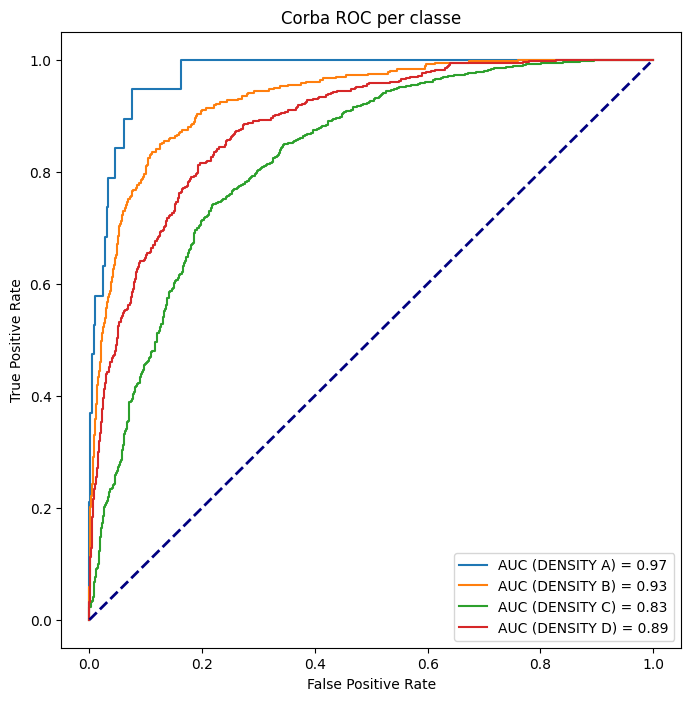

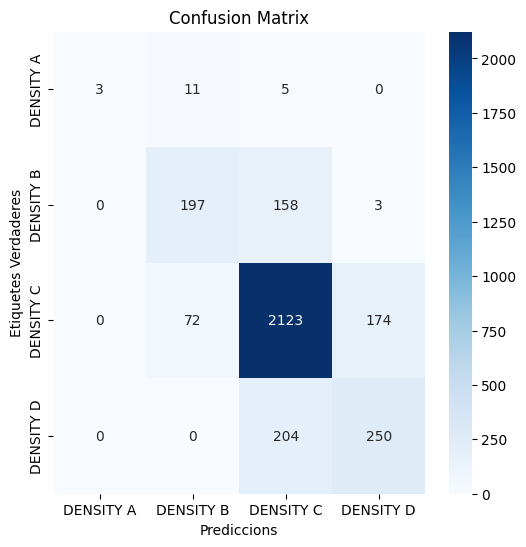


Altres mètriques:
False Positive Rate: 0.5789
False Negative Rate: 0.0000
Sensitivity: 0.8041
Specificity: 0.1579


In [24]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_multiples_classes(learn, dls, dls.vocab)

**UNDERSAMPLING**

In [25]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

nom_columna = 'breast_density'

# Crear un objecte RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    
# Aplicar undersampling només al conjunt train
X_train_resampled, y_train_resampled = rus.fit_resample(train.drop(columns=[nom_columna]), train[nom_columna])

# Crear un nou DataFrame amb les dades igualades en tamany, amb el resampling aplicat
train_resampled_df = pd.DataFrame(X_train_resampled, columns=train.drop(columns=[nom_columna]).columns)
train_resampled_df[nom_columna] = y_train_resampled

# Imprimir la quantitat de cada categoria després del resampling
print("Quants en tenim de cada tipus en el conjunt train fent undersampling:")
print(train_resampled_df[nom_columna].value_counts())

# Creo dataloaders i entreno model per train i test
learn, dls = densitat_quatre_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train_resampled_df, test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Quants en tenim de cada tipus en el conjunt train fent undersampling:
breast_density
DENSITY A    80
DENSITY B    80
DENSITY C    80
DENSITY D    80
Name: count, dtype: int64
Etiquetes: ['DENSITY A', 'DENSITY B', 'DENSITY C', 'DENSITY D']
Nom de les classes: {'DENSITY A': 0, 'DENSITY B': 1, 'DENSITY C': 2, 'DENSITY D': 3}


epoch,train_loss,valid_loss,accuracy,time
0,2.323297,2.174863,0.218750,00:09
1,2.192371,2.053417,0.375000,00:08


epoch,train_loss,valid_loss,accuracy,time
0,1.725828,1.977319,0.421875,00:08
1,1.546262,2.062313,0.375000,00:08
2,1.435790,2.108860,0.390625,00:08
3,1.301852,2.146936,0.390625,00:08
4,1.245206,2.146882,0.390625,00:08


Accuracy en el conjunt de prova: 0.2331250011920929


Classification Report:
              precision    recall  f1-score   support

   DENSITY A       0.46      0.76      0.58        17
   DENSITY B       0.00      0.00      0.00        14
   DENSITY C       0.00      0.00      0.00        19
   DENSITY D       0.39      0.86      0.53        14

    accuracy                           0.39        64
   macro avg       0.21      0.41      0.28        64
weighted avg       0.21      0.39      0.27        64



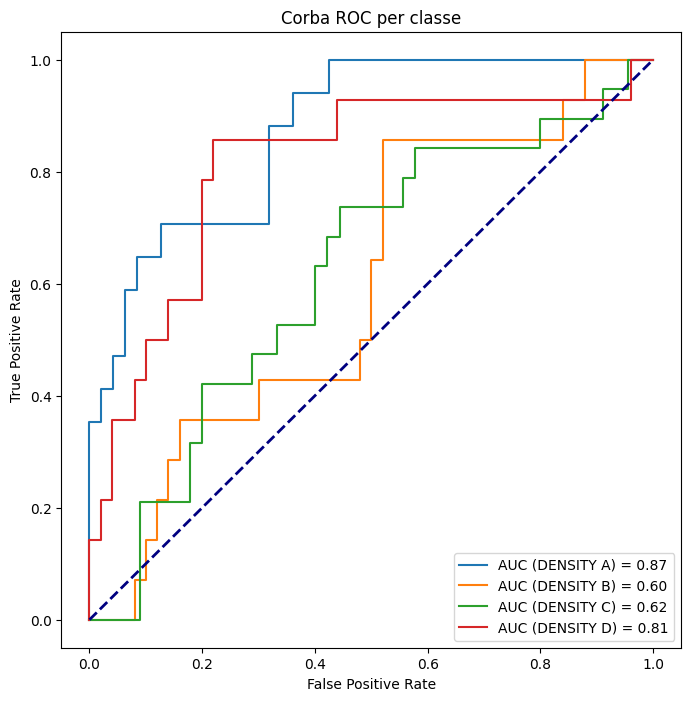

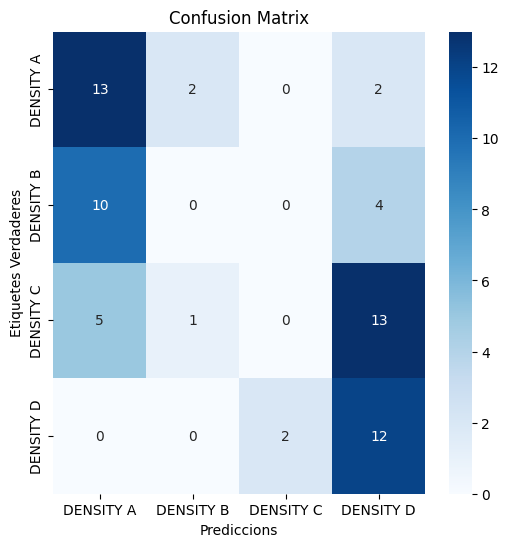


Altres mètriques:
False Positive Rate: 0.1176
False Negative Rate: 0.7143
Sensitivity: 0.3906
Specificity: 0.7647


In [26]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_multiples_classes(learn, dls, dls.vocab)

**OVERSAMPLING**

In [27]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

nom_columna = 'breast_density'

# Crear un objecte RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
    
# Aplicar undersampling només al conjunt train
X_train_resampled, y_train_resampled = ros.fit_resample(train.drop(columns=[nom_columna]), train[nom_columna])

# Crear un nou DataFrame amb les dades igualades en tamany, amb el resampling aplicat
train_resampled_df = pd.DataFrame(X_train_resampled, columns=train.drop(columns=[nom_columna]).columns)
train_resampled_df[nom_columna] = y_train_resampled

# Imprimir la quantitat de cada categoria després del resampling
print("Quants en tenim de cada tipus en el conjunt train fent oversampling:")
print(train_resampled_df[nom_columna].value_counts())

# Creo dataloaders i entreno model per train i test
learn, dls = densitat_quatre_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train_resampled_df, test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Quants en tenim de cada tipus en el conjunt train fent oversampling:
breast_density
DENSITY C    12232
DENSITY D    12232
DENSITY A    12232
DENSITY B    12232
Name: count, dtype: int64
Etiquetes: ['DENSITY A', 'DENSITY B', 'DENSITY C', 'DENSITY D']
Nom de les classes: {'DENSITY A': 0, 'DENSITY B': 1, 'DENSITY C': 2, 'DENSITY D': 3}


epoch,train_loss,valid_loss,accuracy,time
0,0.849621,0.938425,0.629433,13:06
1,0.545773,0.712597,0.696168,12:58


epoch,train_loss,valid_loss,accuracy,time
0,0.394471,0.552160,0.771283,13:28
1,0.312684,0.581850,0.765457,13:17
2,0.249911,0.615748,0.774962,13:21
3,0.172454,0.672441,0.759428,13:33
4,0.141231,0.713288,0.753500,13:28


Accuracy en el conjunt de prova: 0.7950000166893005


Classification Report:
              precision    recall  f1-score   support

   DENSITY A       0.97      0.72      0.83      2443
   DENSITY B       0.72      0.83      0.77      2450
   DENSITY C       0.61      0.79      0.69      2461
   DENSITY D       0.83      0.67      0.74      2431

    accuracy                           0.75      9785
   macro avg       0.78      0.75      0.76      9785
weighted avg       0.78      0.75      0.76      9785



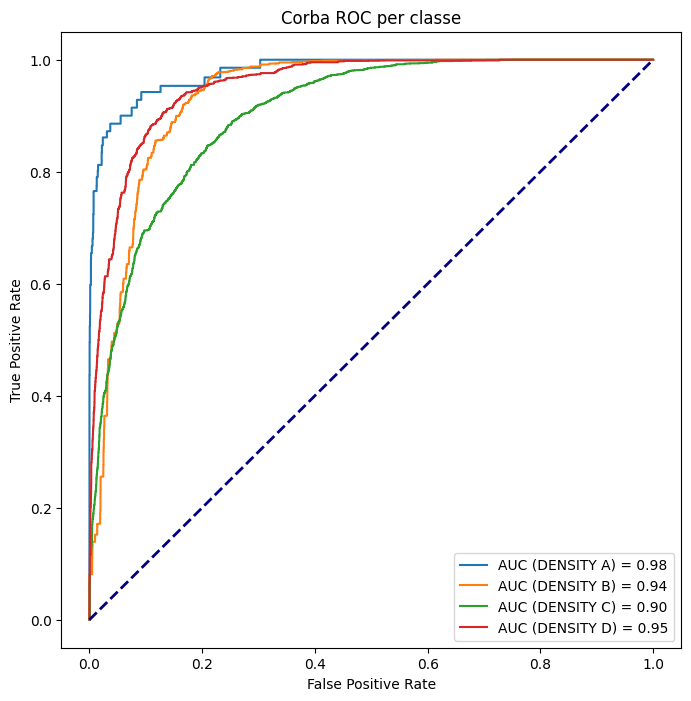

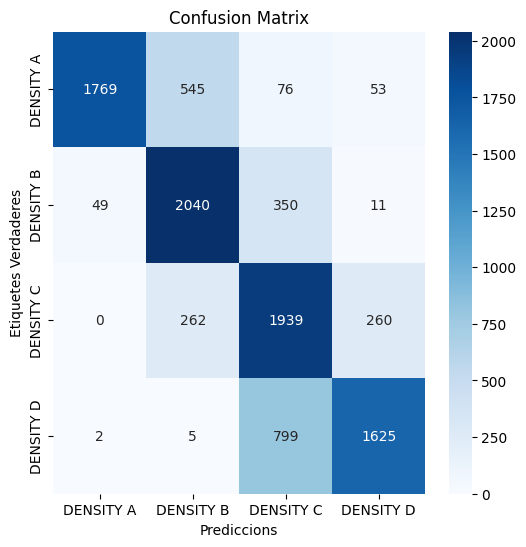


Altres mètriques:
False Positive Rate: 0.2231
False Negative Rate: 0.0200
Sensitivity: 0.7535
Specificity: 0.7241


In [28]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_multiples_classes(learn, dls, dls.vocab)

# **2 CLASSES (A+B) vs (C+D)**

In [29]:
# tamany imatges
from PIL import Image

# Ruta imatge exemple
ruta_imagen = '/kaggle/input/vindr-mammo-dataset/Processed_Images/0025a5dc99fd5c742026f0b2b030d3e9/2ddfad7286c2b016931ceccd1e2c7bbc.png'

# Carregar la imatge 
imagen = Image.open(ruta_imagen)

# Obtenir tamany imatge
ample, alt = imagen.size

# Imprimir Obtenir tamany imatge
print(f'Tamany de la imatge: {ample} x {alt} píxels')

Tamany de la imatge: 886 x 2480 píxels


In [30]:
from fastai.vision.all import *

def densitat_dos_classes(path, train, test, arch=resnet34, bs=64, epochs=3, base_lr=1e-2, freeze_epochs=1):
    path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')
    
    nombre_columna = "breast_density"

    # Transformacions
    tfms = [*aug_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), Normalize.from_stats(*imagenet_stats)]

    # Crear bloc de dades per breast_density
    data = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_x=lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
        get_y=lambda row: "A+B" if row["breast_density"] in ["DENSITY A", "DENSITY B"] else "C+D",
        splitter=RandomSplitter(valid_pct=0.2),
        item_tfms=RandomResizedCrop(224, min_scale=0.5),
        batch_tfms=tfms
    )

    # Crear dataloaders
    dls = data.dataloaders(train, bs=64).cuda()

    # Imprimir les etiquetes
    print("Etiquetes:", dls.vocab)
    print("Nom de les classes:", dls.vocab.o2i)

    # Crear el model de clasificació per breast_density
    learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)

    # Entrenar el model
    learn.fine_tune(epochs=3, base_lr=1e-2, freeze_epochs=1)

    # Evaluar en el conjunt de prova
    t = pd.read_csv('/kaggle/working/test.csv')
    test_dls = data.dataloaders(t, bs=32).cuda()
    test_acc = learn.validate(dl=test_dls[0])[1]
    print(f"Accuracy en el conjunt de prova: {test_acc}")
    
    return learn, test_dls

**SPLIT ORIGINAL**

In [31]:
print(train['breast_density'].value_counts())

# Creo dataloaders i entreno model per train i test
learn, dls = densitat_dos_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train, test)

breast_density
DENSITY C    12232
DENSITY D     2160
DENSITY B     1528
DENSITY A       80
Name: count, dtype: int64
Etiquetes: ['A+B', 'C+D']
Nom de les classes: {'A+B': 0, 'C+D': 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.336779,0.268639,0.899375,04:08


epoch,train_loss,valid_loss,accuracy,time
0,0.190930,0.183399,0.923437,04:13
1,0.167039,0.137591,0.939375,04:13
2,0.143498,0.135820,0.945000,04:14


Accuracy en el conjunt de prova: 0.9446874856948853


Classification Report:
              precision    recall  f1-score   support

         A+B       0.76      0.67      0.71       325
         C+D       0.96      0.98      0.97      2875

    accuracy                           0.94      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.94      0.94      0.94      3200



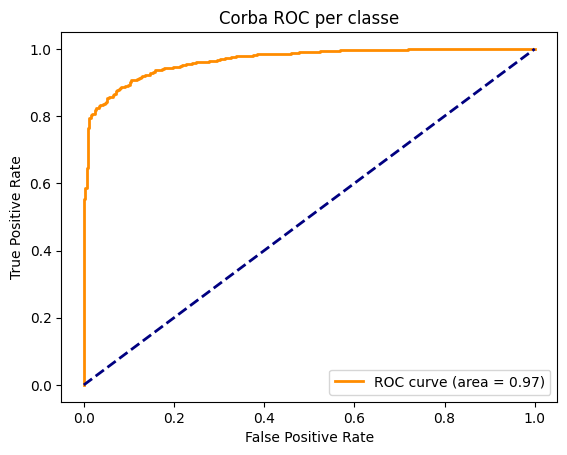

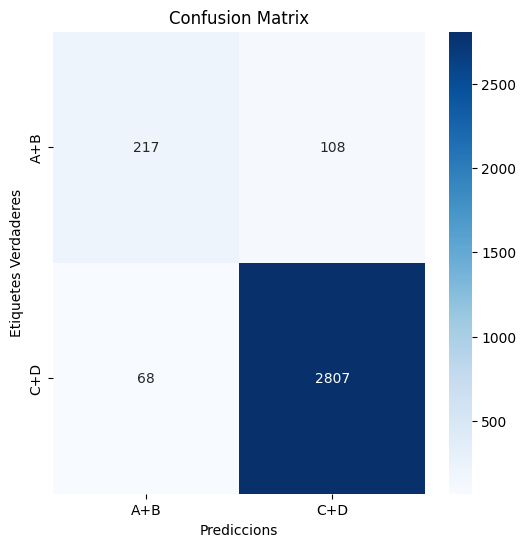


Altres mètriques:
False Positive Rate: 0.3323
False Negative Rate: 0.0237
Sensitivity: 0.9450
Specificity: 0.6677


In [32]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

**UNDERSAMPLING**

In [33]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Crear un objecte RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

nombre_columna = 'breast_density'
    
# Aplicar undersampling només al conjunt train
X_train_resampled, y_train_resampled = rus.fit_resample(train.drop(columns=[nombre_columna]), train[nombre_columna])

# Crear un nou DataFrame amb les dades igualades en tamany, amb el resampling aplicat
train_resampled_df = pd.DataFrame(X_train_resampled, columns=train.drop(columns=[nombre_columna]).columns)
train_resampled_df[nombre_columna] = y_train_resampled

# Imprimir la quantitat de cada categoria després del resampling
print("Quants en tenim de cada tipus en el conjunt train fent undersampling:")
print(train_resampled_df[nombre_columna].value_counts())

# Creo dataloaders i entreno model per train i test
learn, dls = densitat_dos_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train_resampled_df, test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Quants en tenim de cada tipus en el conjunt train fent undersampling:
breast_density
DENSITY A    80
DENSITY B    80
DENSITY C    80
DENSITY D    80
Name: count, dtype: int64
Etiquetes: ['A+B', 'C+D']
Nom de les classes: {'A+B': 0, 'C+D': 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.917622,0.899132,0.781250,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.454852,2.999285,0.593750,00:09
1,0.542774,1.105875,0.859375,00:09
2,0.448297,1.394384,0.812500,00:09


Accuracy en el conjunt de prova: 0.8443750143051147


Classification Report:
              precision    recall  f1-score   support

         A+B       1.00      0.56      0.71        27
         C+D       0.76      1.00      0.86        37

    accuracy                           0.81        64
   macro avg       0.88      0.78      0.79        64
weighted avg       0.86      0.81      0.80        64



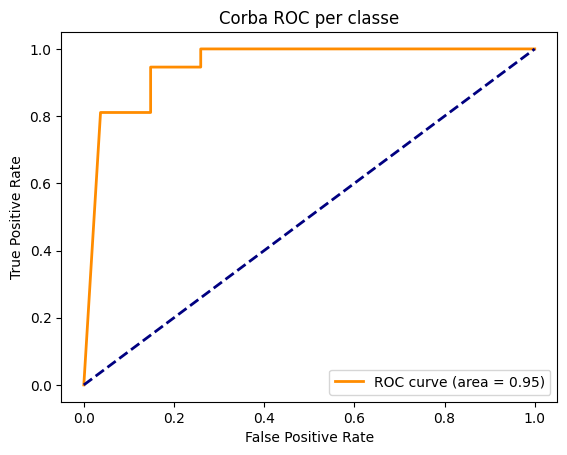

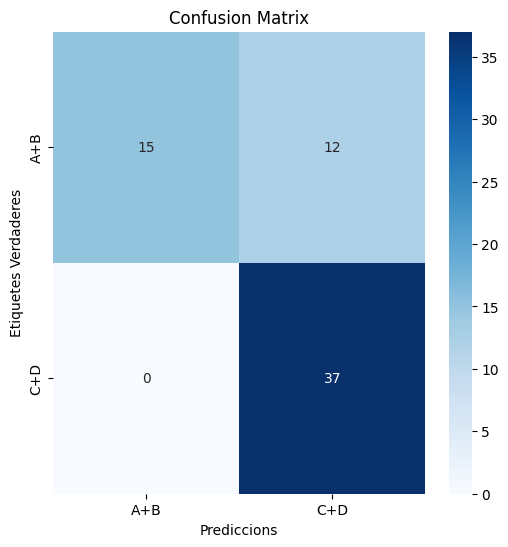


Altres mètriques:
False Positive Rate: 0.4444
False Negative Rate: 0.0000
Sensitivity: 0.8125
Specificity: 0.5556


In [34]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

**OVERSAMPLING**

In [35]:
from imblearn.over_sampling import RandomOverSampler
import warnings
from fastai.data.all import *
from fastai.vision.all import *

# Ignorar FutureWarnings específics ja que em sortia una advertencia sobre una característica que estva desaprovada
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

train = pd.read_csv('/kaggle/working/train.csv')

# Nom de la columna que vols analitzar
nombre_columna = "breast_density"

# Crear un objecte RandomUnderSampler
rus = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Aplicar undersampling només al conjunt train
X_train_resampled, y_train_resampled = rus.fit_resample(train.drop(columns=[nombre_columna]), train[nombre_columna])

# Crear un nou DataFrame amb les dades igualades en tamany, amb el resampling aplicat
train_resampled_df = pd.DataFrame(X_train_resampled, columns=train.drop(columns=[nombre_columna]).columns)
train_resampled_df[nombre_columna] = y_train_resampled

# Imprimir la quantitat de cada categoria després del resampling
print("Quants en tenim de cada tipus en el conjunt train fent oversampling:")
print(train_resampled_df[nombre_columna].value_counts())

# Creo dataloaders i entreno model per train i test
learn, dls = densitat_dos_classes('/kaggle/input/vindr-mammo-dataset/Processed_Images', train_resampled_df, test)

Quants en tenim de cada tipus en el conjunt train fent oversampling:
breast_density
DENSITY C    12232
DENSITY D    12232
DENSITY A    12232
DENSITY B    12232
Name: count, dtype: int64
Etiquetes: ['A+B', 'C+D']
Nom de les classes: {'A+B': 0, 'C+D': 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.259969,0.224205,0.907511,12:58


epoch,train_loss,valid_loss,accuracy,time
0,0.186594,0.182491,0.923352,13:11
1,0.122729,0.181953,0.919469,13:07
2,0.067396,0.195785,0.917731,13:18


Accuracy en el conjunt de prova: 0.9253125190734863


Classification Report:
              precision    recall  f1-score   support

         A+B       0.96      0.88      0.92      4963
         C+D       0.88      0.96      0.92      4822

    accuracy                           0.92      9785
   macro avg       0.92      0.92      0.92      9785
weighted avg       0.92      0.92      0.92      9785



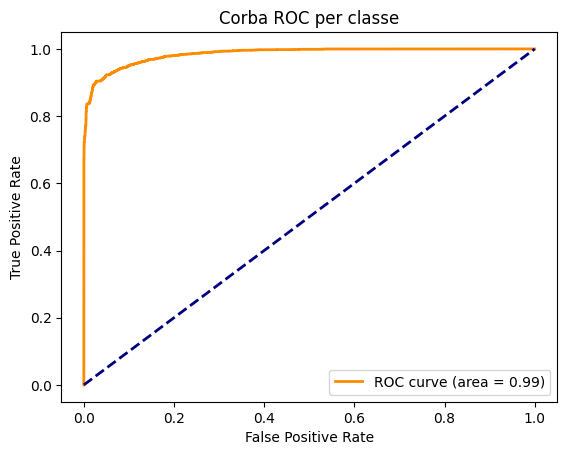

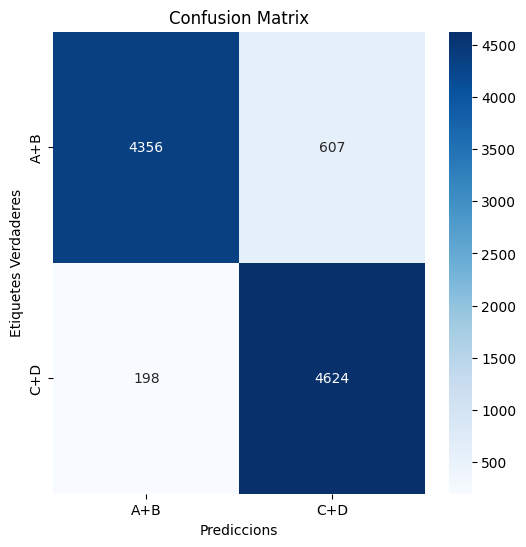


Altres mètriques:
False Positive Rate: 0.1223
False Negative Rate: 0.0411
Sensitivity: 0.9177
Specificity: 0.8777


In [36]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

# **PER FINDING CATEGORIES**

**MASS vs NO FINDING**

In [37]:
# miro quantes tinc de cada categoria al train
path_arxiu = '/kaggle/working/train.csv'
df = pd.read_csv(path_arxiu)
nom_columna = "finding_categories"
quantitat = df[nom_columna].value_counts()

print(f"Quantitat al csv TRAIN de la columna '{nom_columna}':\n{quantitat}")

# miro quantes tinc de cada categoria al test
path_arxiu = '/kaggle/working/test.csv'
df = pd.read_csv(path_arxiu)
nom_columna = "finding_categories"
quantitat = df[nom_columna].value_counts()

print(f"Quantitat al csv TEST de la columna '{nom_columna}':\n{quantitat}")

Quantitat al csv TRAIN de la columna 'finding_categories':
finding_categories
['No Finding']                                                                                      14589
['Mass']                                                                                              745
['Suspicious Calcification']                                                                          189
['Focal Asymmetry']                                                                                   172
['Architectural Distortion']                                                                           67
['Asymmetry']                                                                                          67
['Suspicious Calcification', 'Mass']                                                                   55
['Suspicious Lymph Node']                                                                              19
['Global Asymmetry']                                                      

In [38]:
path_train = '/kaggle/working/train.csv'
dtrain = pd.read_csv(path_train)

path_test = '/kaggle/working/test.csv'
dtest = pd.read_csv(path_test)

# Selecciono les categories que vull filtrar
categories = [['Mass'], ['No Finding']]


# FILTRO PEL TRAIN

# Filtra les files amb les categories seleccionades
filtrat_train = dtrain[dtrain['finding_categories'].apply(lambda x: eval(x)) .isin(categories)]

# Compte quants exemples tenim de cada categoria
quantitat_train = filtrat_train['finding_categories'].value_counts()
print(f'Quantitat per categoria: \n{quantitat_train}')

# Crea el CSV amb les imatges filtrades
filtrat_train.to_csv('/kaggle/working/finding_train.csv', index=False)
finding_train = pd.read_csv('/kaggle/working/finding_train.csv')


# FILTRO PEL TEST

# Filtra les files amb les categories seleccionades
filtrat_test = dtest[dtest['finding_categories'].apply(lambda x: eval(x)) .isin(categories)]

# Compte quants exemples tenim de cada categoria
quantitat_test = filtrat_test['finding_categories'].value_counts()
print(f'Quantitat per categoria: \n{quantitat_test}')

# Crea el CSV amb les imatges filtrades
filtrat_test.to_csv('/kaggle/working/filtered_test.csv', index=False)
finding_test = pd.read_csv('/kaggle/working/filtered_test.csv')

Quantitat per categoria: 
finding_categories
['No Finding']    14589
['Mass']            745
Name: count, dtype: int64
Quantitat per categoria: 
finding_categories
['No Finding']    3643
['Mass']           181
Name: count, dtype: int64


In [39]:
from fastai.data.all import *
from fastai.vision.all import *

# Directori on hi ha les imatges
path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')

# Transformacions
tfms = [*aug_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2, do_flip = False, flip_vert = False), Normalize.from_stats(*imagenet_stats)]

# do_flip i flip_vert
# Crear bloc de dades
# Variable x són les imatges i variable y la etiqueta per classificar el model
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
    get_y = lambda row: row["finding_categories"],
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=tfms
)

# Comprovar si fem servir la GPU 
print(torch.cuda.is_available())

# Crear dataloaders
dls = data.dataloaders(finding_train, bs=64).cuda()

# Imprimir les etiquetes
print("Etiquetes:", dls.vocab)
print("Nom de les classes:", dls.vocab.o2i)

# Crear el model de classificació
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)

# Entrenar el model
learn.fine_tune(epochs=3, base_lr=1e-2, freeze_epochs=1)

# Evaluar en el conjunt test
test_dls = data.dataloaders(finding_test, bs=32).cuda()
test_acc = learn.validate(dl=test_dls[0])[1]
print(f"Accuracy en el conjunt de prova: {test_acc}")

True
Etiquetes: ["['Mass']", "['No Finding']"]
Nom de les classes: {"['Mass']": 0, "['No Finding']": 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.323795,0.280050,0.949119,03:59


epoch,train_loss,valid_loss,accuracy,time
0,0.222848,0.186939,0.954012,04:00
1,0.216029,0.207855,0.952055,03:59
2,0.177323,0.186673,0.953033,03:56


Accuracy en el conjunt de prova: 0.9546052813529968


Classification Report:
                precision    recall  f1-score   support

      ['Mass']       0.67      0.07      0.12       149
['No Finding']       0.95      1.00      0.98      2917

      accuracy                           0.95      3066
     macro avg       0.81      0.53      0.55      3066
  weighted avg       0.94      0.95      0.93      3066



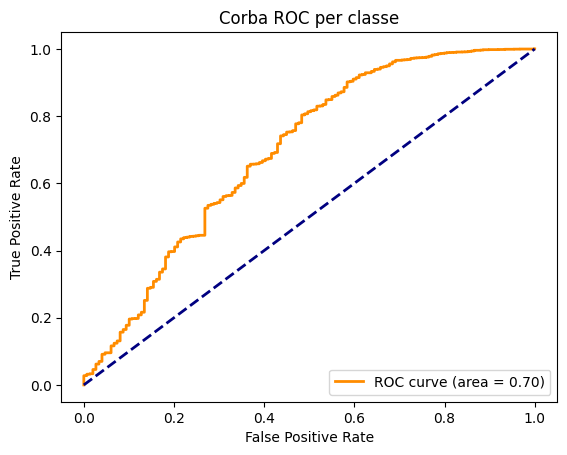

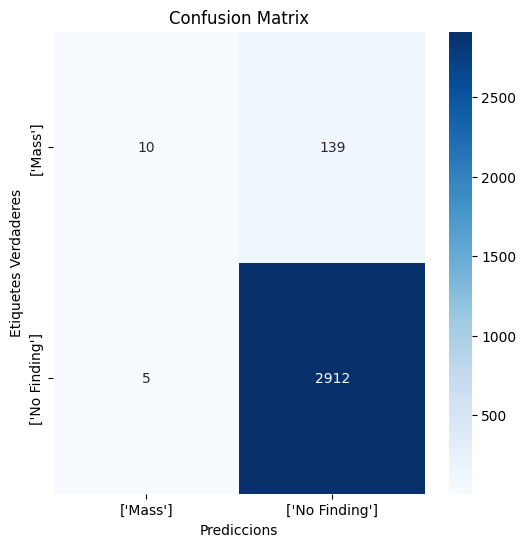


Altres mètriques:
False Positive Rate: 0.9329
False Negative Rate: 0.0017
Sensitivity: 0.9530
Specificity: 0.0671


In [40]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

# **LESIÓ vs NO FINDING**

In [41]:
from fastai.data.all import *
from fastai.vision.all import *

# Directori on hi ha les imatges
path = Path('/kaggle/input/vindr-mammo-dataset/Processed_Images')

# Transformacions
tfms = [*aug_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2, do_flip=False, flip_vert=False),
        Normalize.from_stats(*imagenet_stats)]

# Crear bloc de dades
# Variable x són les imatges i variable y la etiqueta per classificar el model
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=lambda row: path / f'{row["study_id"]}' / f'{row["image_id"]}.png',
    get_y=lambda row: 'No Finding' if 'No Finding' in eval(row["finding_categories"]) else 'Other',
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=tfms
)

# Comprovar si fem servir la GPU
print(torch.cuda.is_available())

# Crear dataloaders
dls = data.dataloaders(finding_train, bs=64).cuda()

# Imprimir les etiquetes
print("Etiquetes:", dls.vocab)
print("Nom de les classes:", dls.vocab.o2i)

# Crear el model de classificació
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)

# Entrenar el model
learn.fine_tune(epochs=3, base_lr=1e-2, freeze_epochs=1)

# Evaluar en el conjunt test
test_dls = data.dataloaders(finding_test, bs=32).cuda()
test_acc = learn.validate(dl=test_dls[0])[1]
print(f"Accuracy en el conjunt de prova: {test_acc}")

True
Etiquetes: ['No Finding', 'Other']
Nom de les classes: {'No Finding': 0, 'Other': 1}


epoch,train_loss,valid_loss,accuracy,time
0,0.338941,0.239238,0.947162,03:52


epoch,train_loss,valid_loss,accuracy,time
0,0.230324,0.264347,0.949772,03:57
1,0.201774,0.192590,0.950098,03:58
2,0.164633,0.186318,0.951076,03:58


Accuracy en el conjunt de prova: 0.9539473652839661


Classification Report:
              precision    recall  f1-score   support

  No Finding       0.95      1.00      0.97      2912
       Other       0.57      0.11      0.18       154

    accuracy                           0.95      3066
   macro avg       0.76      0.55      0.58      3066
weighted avg       0.94      0.95      0.94      3066



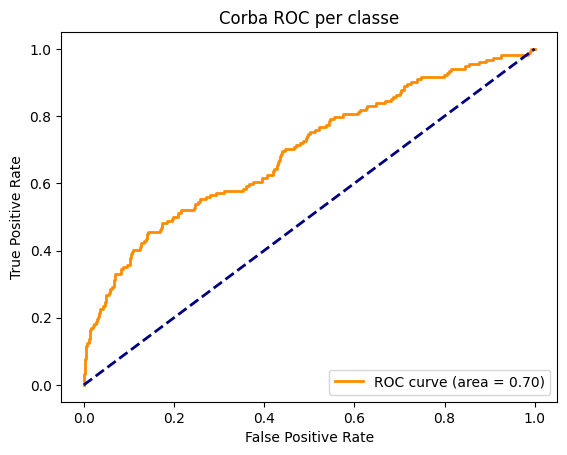

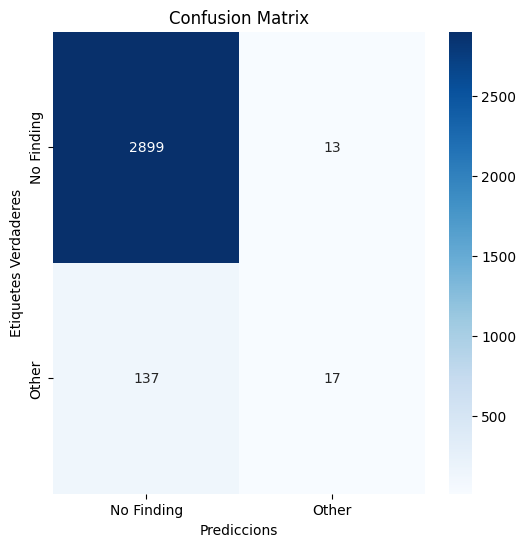


Altres mètriques:
False Positive Rate: 0.0045
False Negative Rate: 0.8896
Sensitivity: 0.9511
Specificity: 0.9955


In [42]:
# Evaluació model corba ROC, confunsion matrix i resultats altres mètriques
evaluacio_model_binari(learn, dls, dls.vocab)

In [43]:
# Comptar el numero d'exemples de'No Finding' i les altres lesions sumades 
count_no_finding = (train['finding_categories'].apply(lambda x: 'No Finding' in eval(x))).sum()
count_other_lesions = train.shape[0] - count_no_finding

print(f"Número d'exemples de 'No Finding': {count_no_finding}")
print(f"Número d'exemples d'altres lesions: {count_other_lesions}")

Número d'exemples de 'No Finding': 14589
Número d'exemples d'altres lesions: 1411
